In [1]:
# Getting files directions
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# Data analysis and wrangling
import random as rnd
import numpy as np
import pandas as pd

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Missing values imputer
from sklearn.impute import SimpleImputer

# Machine learning tools



import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading the training data
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
# Shape of the training dataset
train_df.shape

(1460, 81)

In [5]:
# Loading the test data
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [6]:
# Shape of the testing dataset
test_df.shape

(1459, 80)

In [7]:
# Getting information about datasets
train_df.info()
print('\n'+ '='*50 + '\n')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Counting missing values in columns
print('Traing data:')
miss_val_td = train_df.isnull().sum()
print(miss_val_td[miss_val_td > 0])

print('='*20)

print('Testing data:')
miss_val_tsd = test_df.isnull().sum()
print(miss_val_tsd[miss_val_tsd > 0])

Traing data:
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
Testing data:
MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea     

In [9]:
# Describing training dataset with descriptive statistics
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
# Describing categorical features of training data
train_df.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [11]:
numeric = [i for i in train_df.columns if train_df[i].dtype in ['int64','float64']]
numeric_data = train_df[numeric]
numeric_data.shape

(1460, 38)

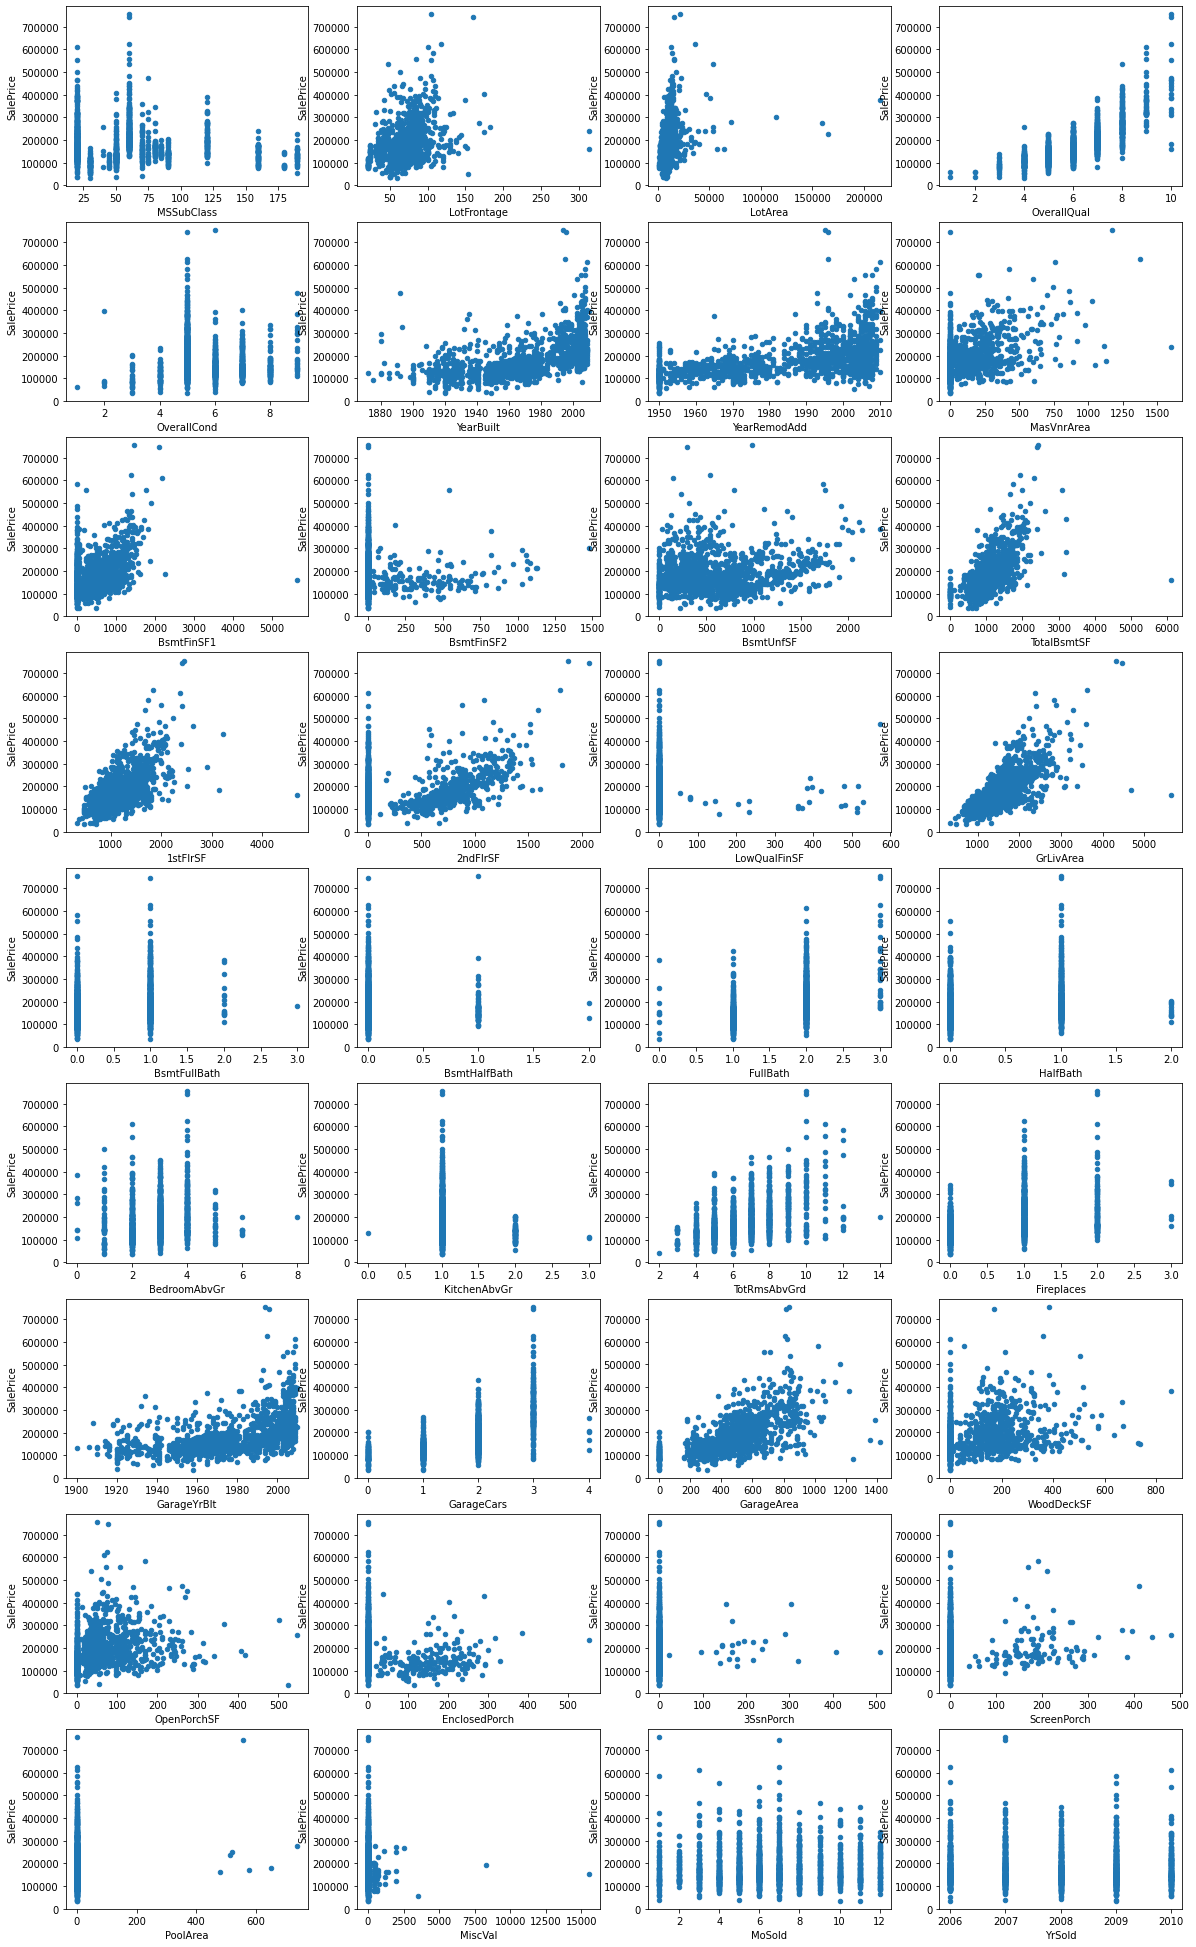

In [12]:
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(20, 35))
for idx, feature in enumerate(numeric_data.columns[1:-1]):
    numeric_data.plot(feature, "SalePrice", subplots=True, kind="scatter", ax=axes[idx//4, idx%4])

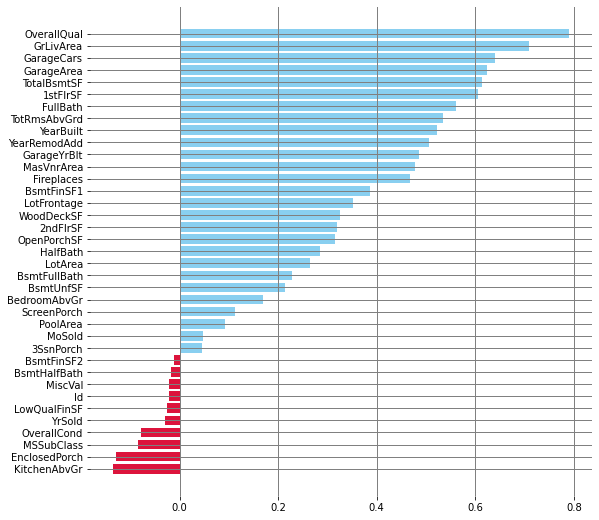

In [13]:
corr = numeric_data[numeric_data.columns].corr()['SalePrice'][:-1].sort_values(ascending=True).to_frame()

# Visualization
fig, ax = plt.subplots(figsize =(9, 9))
ax.barh(corr.index, corr.SalePrice, align='center', color = np.where(corr['SalePrice'] < 0, 'crimson', '#89CFF0'))
ax.grid(color='grey', linewidth=1)

# Remove axes spines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

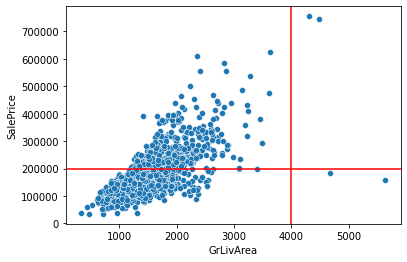

In [14]:
sns.scatterplot(data=train_df, x='GrLivArea', y='SalePrice')
plt.axhline(y=200000, color='r')
plt.axvline(x=4000, color='r')

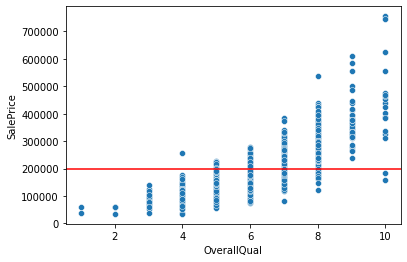

In [15]:
sns.scatterplot(data=train_df, x='OverallQual', y='SalePrice')
plt.axhline(y=200000, color='r')

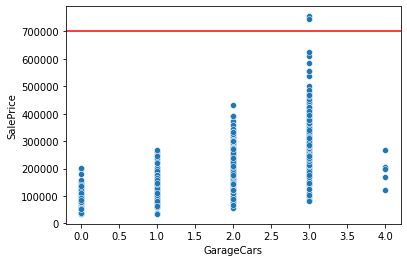

In [16]:
sns.scatterplot(data=train_df, x='GarageCars', y='SalePrice')
plt.axhline(y=700000, color='r')

In [17]:
drop_index_one = train_df[(train_df['SalePrice'] > 700000)].index
drop_index_two = train_df[(train_df['OverallQual'] > 8) & (train_df['SalePrice'] < 200000)].index
drop_index_one, drop_index_two

(Int64Index([691, 1182], dtype='int64'),
 Int64Index([523, 1298], dtype='int64'))

In [18]:
to_drop = [drop_index_one[0], drop_index_one[1], drop_index_two[0], drop_index_two[1]]
to_drop

[691, 1182, 523, 1298]

In [19]:
train_df = train_df.drop(to_drop, axis=0)

In [20]:
# Do we have duplicates?
print('Number of Duplicates in tain data:', len(train_df[train_df.duplicated()]))
print('Number of Duplicates in test data:', len(test_df[test_df.duplicated()]))

Number of Duplicates in tain data: 0
Number of Duplicates in test data: 0


# <center>Handling Missing Data<center>

In [21]:
print('Traing data:')
miss_val_td = train_df.isnull().sum().sort_values(ascending=False)
print(miss_val_td[miss_val_td > 0])

print('='*20)

print('Testing data:')
miss_val_tsd = test_df.isnull().sum().sort_values(ascending=False)
print(miss_val_tsd[miss_val_tsd > 0])

print('='*20)
print(len(miss_val_td[miss_val_td > 0].to_frame().T.columns) == len(miss_val_tsd[miss_val_tsd > 0].to_frame().T.columns))

Traing data:
PoolQC          1451
MiscFeature     1402
Alley           1365
Fence           1176
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64
Testing data:
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual    

In [22]:
none_columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageQual', 'GarageFinish',
               'GarageType','BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']

In [23]:
for column in none_columns:
    train_df.loc[train_df[column].isnull(), column] = 'None'
    test_df.loc[test_df[column].isnull(), column] = 'None'

In [24]:
print('Traing data:')
miss_val_td = train_df.isnull().sum().sort_values(ascending=False)
print(miss_val_td[miss_val_td > 0])

print('='*20)

print('Testing data:')
miss_val_tsd = test_df.isnull().sum().sort_values(ascending=False)
print(miss_val_tsd[miss_val_tsd > 0])

Traing data:
LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
Electrical       1
dtype: int64
Testing data:
LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
MSZoning          4
BsmtFullBath      2
BsmtHalfBath      2
Utilities         2
Functional        2
Exterior2nd       1
Exterior1st       1
GarageArea        1
KitchenQual       1
BsmtFinSF1        1
GarageCars        1
BsmtUnfSF         1
TotalBsmtSF       1
SaleType          1
BsmtFinSF2        1
dtype: int64


In [25]:
mode_columns = ['Electrical', 'LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'MSZoning', 'BsmtFullBath', 'BsmtHalfBath',
               'Utilities', 'BsmtFinSF1', 'Exterior1st', 'KitchenQual', 'GarageArea', 'GarageCars', 'Exterior2nd',
               'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'SaleType', 'Functional']

In [26]:
for column in mode_columns:
    train_df.loc[train_df[column].isnull(), column] = train_df[column].mode()[0]
    test_df.loc[test_df[column].isnull(), column] = test_df[column].mode()[0]

In [27]:
print('Traing data:')
miss_val_td = train_df.isnull().sum().sort_values(ascending=False)
print(miss_val_td[miss_val_td > 0])

print('='*20)

print('Testing data:')
miss_val_tsd = test_df.isnull().sum().sort_values(ascending=False)
print(miss_val_tsd[miss_val_tsd > 0])

Traing data:
Series([], dtype: int64)
Testing data:
Series([], dtype: int64)


# <center>Feature engineering<center>

In [28]:
categorical = [i for i in train_df.columns if train_df[i].dtype not in ['int64','float64']]
print(categorical)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

train_encoded = train_df[categorical].apply(encoder.fit_transform)
test_encoded = test_df[categorical].apply(encoder.fit_transform)

In [30]:
train_encoded.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
1,3,1,1,3,3,0,2,0,24,1,...,1,2,5,5,2,3,4,1,8,4
2,3,1,1,0,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
3,3,1,1,0,3,0,0,0,6,2,...,5,3,5,5,2,3,4,1,8,0
4,3,1,1,0,3,0,2,0,15,2,...,1,2,5,5,2,3,4,1,8,4


In [31]:
train_data = train_df[numeric].join(train_encoded)
test_data = test_df[numeric[:-1]].join(test_encoded)

train_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,1,2,5,5,2,3,4,1,8,4
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,1,2,5,5,2,3,4,1,8,4
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,1,2,5,5,2,3,4,1,8,4
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,5,3,5,5,2,3,4,1,8,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,1,2,5,5,2,3,4,1,8,4


In [32]:
test_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,1,3,4,5,2,2,2,1,8,4
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,1,3,4,5,2,2,4,0,8,4
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,1,0,4,5,2,2,2,1,8,4
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,1,0,4,5,2,2,4,1,8,4
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,1,2,4,5,2,2,4,1,8,4


In [33]:
cat_features = [
    'MSZoning', 'Utilities', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'ExterQual', 'Heating', 
    'HeatingQC', 'CentralAir', 'Functional', 'GarageType', 'GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition'
]

In [34]:
import itertools
interactions = pd.DataFrame(index=train_df.index)

for col1, col2 in itertools.combinations(cat_features, 2):
    new_col_name = '_'.join([col1, col2])
    new_values = train_df[col1].map(str) + '_' + train_df[col2].map(str)
    encoder = LabelEncoder()
    interactions[new_col_name] = encoder.fit_transform(new_values)

In [35]:
interactions.head()

,MSZoning_Utilities,MSZoning_Neighborhood,MSZoning_Condition1,MSZoning_BldgType,MSZoning_HouseStyle,MSZoning_ExterQual,MSZoning_Heating,MSZoning_HeatingQC,MSZoning_CentralAir,MSZoning_Functional,...,GarageType_GarageQual,GarageType_PavedDrive,GarageType_SaleType,GarageType_SaleCondition,GarageQual_PavedDrive,GarageQual_SaleType,GarageQual_SaleCondition,PavedDrive_SaleType,PavedDrive_SaleCondition,SaleType_SaleCondition
0,3,11,9,9,17,10,5,8,6,9,...,4,4,8,6,13,20,19,15,11,18
1,3,28,8,9,14,11,5,8,6,9,...,4,4,8,6,13,20,19,15,11,18
2,3,11,9,9,17,10,5,8,6,9,...,4,4,8,6,13,20,19,15,11,18
3,3,12,9,9,17,11,5,10,6,9,...,15,13,24,19,13,20,15,15,7,14
4,3,19,9,9,17,10,5,8,6,9,...,4,4,8,6,13,20,19,15,11,18


In [36]:
train_data = train_data.join(interactions)
test_data = test_data.join(interactions)

train_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType_GarageQual,GarageType_PavedDrive,GarageType_SaleType,GarageType_SaleCondition,GarageQual_PavedDrive,GarageQual_SaleType,GarageQual_SaleCondition,PavedDrive_SaleType,PavedDrive_SaleCondition,SaleType_SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,4,4,8,6,13,20,19,15,11,18
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,4,4,8,6,13,20,19,15,11,18
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,4,4,8,6,13,20,19,15,11,18
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,15,13,24,19,13,20,15,15,7,14
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,4,4,8,6,13,20,19,15,11,18


In [37]:
from sklearn.utils import shuffle

X_full = train_data.copy()
X_full = X_full.drop(['Id'], axis = 1)
X_full = shuffle(X_full, random_state=123)
y_full = X_full['SalePrice']
X_full = X_full.drop(['SalePrice'], axis = 1)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_full, y_full, train_size=0.7, test_size=0.3)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

logistic = LogisticRegression(C=0.05, penalty='l1', solver='liblinear', random_state=7).fit(X_train, y_train)
model = SelectFromModel(logistic, prefit=True)
X_new = model.transform(X_train)

selected_features = pd.DataFrame(model.inverse_transform(X_new), index=X_train.index, columns=X_train.columns)
selected_columns = selected_features.columns[selected_features.var() != 0]
cols_to_drop = selected_features.columns[selected_features.var() == 0]

In [40]:
selected_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'Exterior1st',
       'MSZoning_Neighborhood', 'Neighborhood_HouseStyle',
       'Neighborhood_HeatingQC', 'Neighborhood_Functional',
       'Neighborhood_GarageType', 'Neighborhood_SaleType',
       'Neighborhood_SaleCondition', 'Condition1_HouseStyle',
       'Condition1_GarageType', 'Condition1_SaleType', 'HouseStyle_HeatingQC',
       'HouseStyle_GarageType', 'HouseStyle_GarageQual', 'HouseStyle_SaleType',
       'HouseStyle_SaleCondition', 'ExterQual_Functional',
       'ExterQual_SaleType', 'HeatingQC_Functional', 'HeatingQC_GarageType',
       'HeatingQC_SaleType', 'Functional_GarageType', 'Functional_SaleType',
       'Ga

In [41]:
print(len(selected_columns))

52


In [42]:
# from sklearn.feature_selection import SelectKBest, f_classif

# selector = SelectKBest(f_classif, k=8)
# new = selector.fit_transform(X_train, y_train)

# selected_feat = pd.DataFrame(selector.inverse_transform(new), index=X_train.index, columns=X_train.columns)
# selected_cols = selected_feat.columns[selected_feat.var() != 0]

# print(selected_cols)
# print(len(selected_cols))

In [43]:
X_train = X_train.drop(cols_to_drop, axis=1)
X_valid = X_valid.drop(cols_to_drop, axis=1)
test_data = test_data.drop(cols_to_drop, axis=1)

In [44]:
# from sklearn import model_selection, linear_model, metrics, pipeline, preprocessing
# regressor = RandomForestRegressor(random_state = 0, max_depth = 20, n_estimators = 50)

In [45]:
import xgboost as xg
from sklearn.metrics import mean_squared_error, mean_absolute_error

xg_reg = xg.XGBRegressor(n_estimators = 1000, learning_rate=0.05)
xg_reg.fit(X_train, y_train)
pred = xg_reg.predict(X_valid)
# print(xg_reg.score(X_train, y_train))
# np.sqrt(mean_squared_log_error(pred, y_valid))
mean = mean_absolute_error(pred, y_valid)
mean

16149.408404247712

In [46]:
ids = test_data['Id']
test_data = test_data.drop(['Id'], axis=1)
result = xg_reg.predict(test_data)
submission = pd.DataFrame({
        "Id": ids,
        "SalePrice": result
    })
submission.to_csv('submission.csv', index=False)